In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML
from datetime import timedelta
import seaborn as sns


In [34]:
reuse = pd.read_csv('1711650784---28-03-2024---18:33:04.reuse.csv',
  names=["File", "Condition", "Metric", "Value"])
noreuse = pd.read_csv('1711649570---28-03-2024---18:12:50.noreuse.csv', 
                      names=["File", "Condition", "Metric", "Value"])
print("noreuse"); display(noreuse);
print("reuse"); display(reuse);

noreuse


,File,Condition,Metric,Value
0,Init/Prelude.lean,reuse_across_ctor_disabled,rss,147263488
1,Init/Prelude.lean,reuse_across_ctor_disabled,num_alloc,1321689
2,Init/Prelude.lean,reuse_across_ctor_disabled,num_small_alloc,26538166
3,Init/Prelude.lean,reuse_across_ctor_disabled,num_dealloc,1273439
4,Init/Prelude.lean,reuse_across_ctor_disabled,num_small_dealloc,26156926
...,...,...,...,...
8495,Lake/Main.lean,reuse_across_ctor_disabled,num_segments,4
8496,Lake/Main.lean,reuse_across_ctor_disabled,num_pages,3715
8497,Lake/Main.lean,reuse_across_ctor_disabled,num_exports,0
8498,Lake/Main.lean,reuse_across_ctor_disabled,num_recycled_pages,743


reuse


,File,Condition,Metric,Value
0,Init/Prelude.lean,reuse_across_ctor_enabled,rss,147271680
1,Init/Prelude.lean,reuse_across_ctor_enabled,num_alloc,1321786
2,Init/Prelude.lean,reuse_across_ctor_enabled,num_small_alloc,26538897
3,Init/Prelude.lean,reuse_across_ctor_enabled,num_dealloc,1273534
4,Init/Prelude.lean,reuse_across_ctor_enabled,num_small_dealloc,26157624
...,...,...,...,...
8495,Lake/Main.lean,reuse_across_ctor_enabled,num_segments,4
8496,Lake/Main.lean,reuse_across_ctor_enabled,num_pages,3714
8497,Lake/Main.lean,reuse_across_ctor_enabled,num_exports,0
8498,Lake/Main.lean,reuse_across_ctor_enabled,num_recycled_pages,743


In [35]:
# Filtering the rows where Metric is 'time_elapsed_ms' and then summing the 'Value' column for both DataFrames
sum_time_elapsed_reuse = reuse[reuse["Metric"] == "time_elapsed_ms"]["Value"].sum()
sum_time_elapsed_no_reuse = noreuse[noreuse["Metric"] == "time_elapsed_ms"]["Value"].sum()

sum_time_elapsed_reuse, sum_time_elapsed_no_reuse

# Ensuring the values are in a compatible format for timedelta
time_reuse = timedelta(milliseconds=int(sum_time_elapsed_reuse))
time_no_reuse = timedelta(milliseconds=int(sum_time_elapsed_no_reuse))

# Formatting as hours:minutes:seconds.milliseconds again
time_format_reuse = str(time_reuse)
time_format_no_reuse = str(time_no_reuse)
print(f"time (reuse): {time_format_reuse} | time (noreuse): {time_format_no_reuse}")

time (reuse): 0:26:49.106000 | time (noreuse): 0:27:00.122000


In [36]:
df_merged = pd.merge(reuse, noreuse, on=["File", "Metric"], suffixes=('_reuse', '_no_reuse'))
display(df_merged)

,File,Condition_reuse,Metric,Value_reuse,Condition_no_reuse,Value_no_reuse
0,Init/Prelude.lean,reuse_across_ctor_enabled,rss,147271680,reuse_across_ctor_disabled,147263488
1,Init/Prelude.lean,reuse_across_ctor_enabled,num_alloc,1321786,reuse_across_ctor_disabled,1321689
2,Init/Prelude.lean,reuse_across_ctor_enabled,num_small_alloc,26538897,reuse_across_ctor_disabled,26538166
3,Init/Prelude.lean,reuse_across_ctor_enabled,num_dealloc,1273534,reuse_across_ctor_disabled,1273439
4,Init/Prelude.lean,reuse_across_ctor_enabled,num_small_dealloc,26157624,reuse_across_ctor_disabled,26156926
...,...,...,...,...,...,...
8495,Lake/Main.lean,reuse_across_ctor_enabled,num_segments,4,reuse_across_ctor_disabled,4
8496,Lake/Main.lean,reuse_across_ctor_enabled,num_pages,3714,reuse_across_ctor_disabled,3715
8497,Lake/Main.lean,reuse_across_ctor_enabled,num_exports,0,reuse_across_ctor_disabled,0
8498,Lake/Main.lean,reuse_across_ctor_enabled,num_recycled_pages,743,reuse_across_ctor_disabled,743


,File,Value_reuse,Value_no_reuse,absolute_diff,%Decrease
0,Lean/Meta/Tactic/Simp.lean,448,1058,610,57.655955
1,Lean/Server/FileWorker/SetupFile.lean,708,1648,940,57.038835
2,Lean/Elab/Tactic/Meta.lean,532,1159,627,54.098361
3,Lean/Linter/Builtin.lean,964,1970,1006,51.065990
4,Lean/Util/TestExtern.lean,633,1206,573,47.512438
...,...,...,...,...,...
845,Lean/Compiler/LCNF/ReduceJpArity.lean,1305,694,-611,-88.040346
846,Lean/Elab/PreDefinition/WF/Ite.lean,684,358,-326,-91.061453
847,Lean/Meta/Tactic/LinearArith/Main.lean,530,256,-274,-107.031250
848,Lean/Linter.lean,807,386,-421,-109.067358


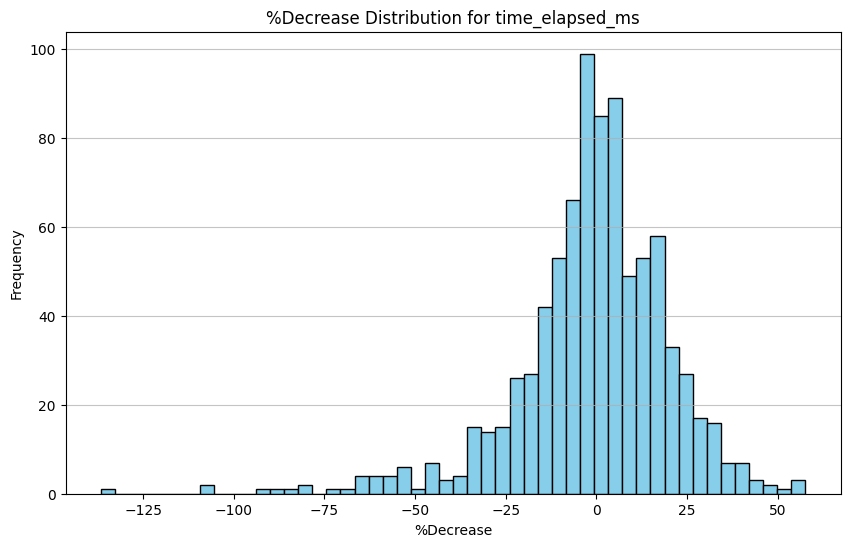

,File,Value_reuse,Value_no_reuse,absolute_diff,%Decrease
0,Init/System.lean,103092224,104534016,1441792,1.379256
1,Lake/Config/Defaults.lean,134516736,135942144,1425408,1.048540
2,Init/Control/Reader.lean,82726912,83513344,786432,0.941684
3,Init/Control/StateCps.lean,106766336,107687936,921600,0.855806
4,Init/Data/Array/BasicAux.lean,117215232,118132736,917504,0.776672
...,...,...,...,...,...
845,Lean/Data/Lsp/Internal.lean,152236032,150065152,-2170880,-1.446625
846,Lean/Elab/Syntax.lean,284327936,280264704,-4063232,-1.449784
847,Lean/Elab/BuiltinNotation.lean,307138560,302682112,-4456448,-1.472320
848,Init/Data/Char.lean,80601088,79421440,-1179648,-1.485302


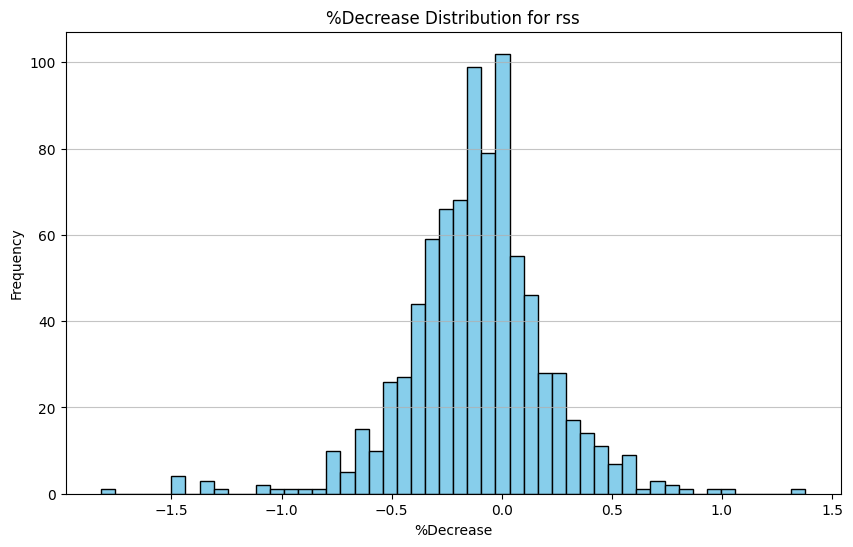

,File,Value_reuse,Value_no_reuse,absolute_diff,%Decrease
0,Lean/Meta/CtorRecognizer.lean,3389989,3399868,9879,0.290570
1,Lake/Util/Proc.lean,3255759,3259370,3611,0.110788
2,Lean/Meta/LevelDefEq.lean,8274006,8281352,7346,0.088705
3,Lean/Compiler/LCNF/Simp/Basic.lean,1577726,1578473,747,0.047324
4,Lean/Elab/RecAppSyntax.lean,1040995,1041487,492,0.047240
...,...,...,...,...,...
845,Lean/Server/Rpc/Deriving.lean,18946568,18330799,-615769,-3.359204
846,Lean/Meta/Tactic/Rewrite.lean,6927590,6673298,-254292,-3.810590
847,Lean/Data/Lsp/Internal.lean,8299156,7965528,-333628,-4.188398
848,Lean/Meta/Coe.lean,12094428,11295181,-799247,-7.076000


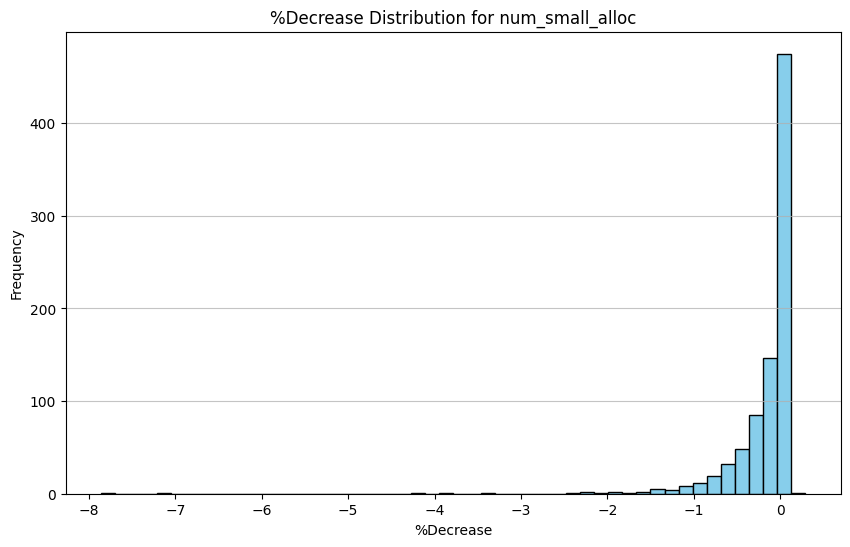

,File,Value_reuse,Value_no_reuse,absolute_diff,%Decrease
0,Lean/Meta/CtorRecognizer.lean,138881,139844,963,0.688624
1,Lean/Data/LOption.lean,41913,42005,92,0.219022
2,Lean/Util/FileSetupInfo.lean,48192,48296,104,0.215339
3,Lean/Meta/LevelDefEq.lean,340504,341207,703,0.206033
4,Lean/Server/CompletionItemData.lean,62017,62131,114,0.183483
...,...,...,...,...,...
845,Lean/Data/Lsp/Internal.lean,397898,366489,-31409,-8.570244
846,Lean/Meta/Coe.lean,537971,491859,-46112,-9.375044
847,Lean/Meta/Tactic/Rewrite.lean,284497,258123,-26374,-10.217609
848,Lean/Server/Rpc/Deriving.lean,848615,755644,-92971,-12.303545


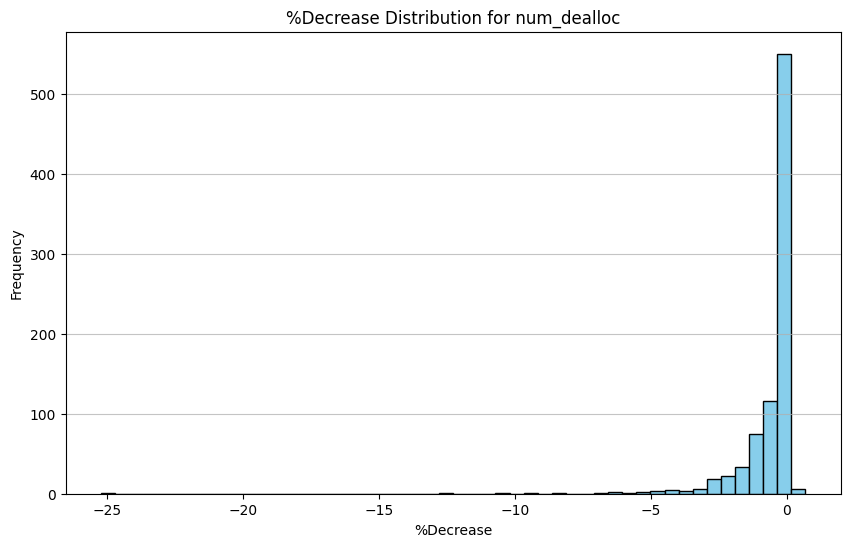

,File,Value_reuse,Value_no_reuse,absolute_diff,%Decrease
0,Lean/Meta/CtorRecognizer.lean,2949493,2959032,9539,0.322369
1,Lake/Util/Proc.lean,2872295,2875886,3591,0.124866
2,Lean/Meta/LevelDefEq.lean,7820450,7827520,7070,0.090322
3,Lean/Elab/RecAppSyntax.lean,702660,703113,453,0.064428
4,Lean/Compiler/LCNF/Simp/Basic.lean,1119611,1120306,695,0.062037
...,...,...,...,...,...
845,Lean/Server/Rpc/Deriving.lean,18284196,17689437,-594759,-3.362227
846,Lean/Meta/Tactic/Rewrite.lean,6428641,6182477,-246164,-3.981640
847,Lean/Data/Lsp/Internal.lean,7878258,7552879,-325379,-4.308013
848,Lean/Meta/Coe.lean,11590120,10805959,-784161,-7.256746


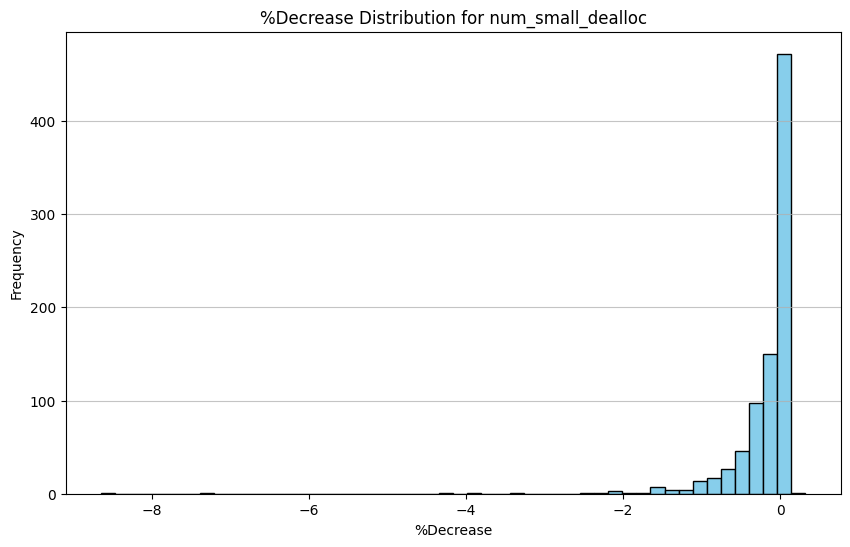

<Axes: >

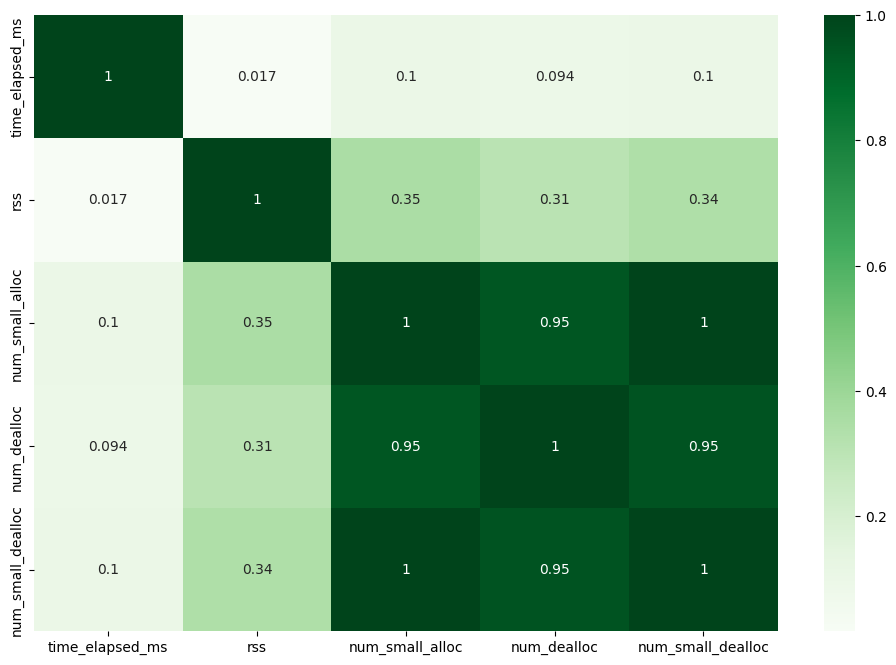

In [37]:
# metrics for which we should compute decreases
df_corr = pd.DataFrame(df_merged["File"].unique(), columns=["File"]) 

for metric in ["time_elapsed_ms", "rss", "num_small_alloc", "num_dealloc", "num_small_dealloc"]:
  display(HTML(f"<h1>{metric}</h1>"))
  df_metric = df_merged[df_merged["Metric"] == metric].copy()
  df_metric["absolute_diff"] = df_merged["Value_no_reuse"] - df_merged["Value_reuse"]
  df_metric["%Decrease"] = (
    100.0 * (df_merged["Value_no_reuse"] - df_merged["Value_reuse"]) / df_merged["Value_no_reuse"]
  )
  df_metric = df_metric.drop(["Condition_reuse", "Condition_no_reuse", "Metric"], axis=1)

  df_kv = df_metric[["File", "%Decrease"]].copy()
  df_kv.rename(columns={"%Decrease": metric}, inplace=True)
  df_corr = pd.merge(df_corr, df_kv, on="File", how="outer")
  
  # Sorting by maximum decrease
  df_metric_sorted = df_metric.sort_values(by="%Decrease", ascending=False)
  df_metric_sorted.reset_index(drop=True, inplace=True) # changes index to start from zero.
  display(df_metric_sorted)
  plt.figure(figsize=(10, 6))
  plt.hist(df_metric_sorted['%Decrease'], bins=50, color='skyblue', edgecolor='black')
  plt.title(f'%Decrease Distribution for {metric}')
  plt.xlabel('%Decrease')
  plt.ylabel('Frequency')
  plt.grid(axis='y', alpha=0.75)
  plt.show()

corr = df_corr.drop('File', axis=1).corr()  # Assuming df_corr is defined and populated
plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap="Greens",annot=True)


,time_elapsed_ms,num_alloc
File,,
Lean/Elab/Do.lean,29918,6328533
Lean/Elab/Tactic/Omega/Frontend.lean,26281,4060735
Lean/PrettyPrinter/Delaborator/Builtins.lean,20278,5256405
Lean/Elab/Quotation.lean,20255,4037147
Lean/Elab/Match.lean,18559,3847466
...,...,...
Init/Data/Format.lean,138,57273
Init/Data/FloatArray.lean,136,55502
Init/Data/String.lean,133,55644


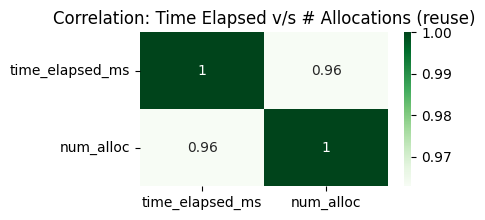

,time_elapsed_ms,num_alloc
File,,
Lean/Elab/Tactic/Omega/Frontend.lean,31049,4034116
Lean/Elab/Do.lean,26141,6328540
Lean/PrettyPrinter/Delaborator/Builtins.lean,22876,5228121
Lean/Elab/App.lean,20614,4005911
Lean/Elab/Quotation.lean,19034,3926757
...,...,...
Init/Data/Option/BasicAux.lean,144,59053
Init/Data/FloatArray.lean,133,55502
Init/Data/String.lean,125,55644


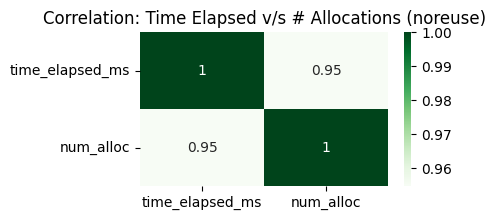

,time_elapsed_ms,num_alloc
File,,
Lean/Elab/Tactic/Omega/Frontend.lean,31049,4034116
Lean/Elab/Do.lean,29918,6328533
Lean/Elab/Tactic/Omega/Frontend.lean,26281,4060735
Lean/Elab/Do.lean,26141,6328540
Lean/PrettyPrinter/Delaborator/Builtins.lean,22876,5228121
...,...,...
Init/Data/String.lean,125,55644
Init/Data/Char.lean,119,53141
Init/Data/Char.lean,117,53141


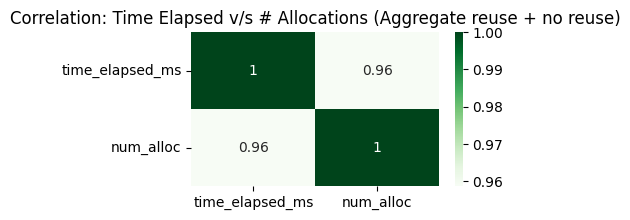

In [62]:
df_full = None

# for each file, grab num alloc and time elapsed.
variant2df = { "reuse" : reuse, "noreuse": noreuse }
for (variant, df) in variant2df.items():
    metric2df = {}
    for metric in ["time_elapsed_ms", "num_alloc"]:
      out = df[df["Metric"] == metric].copy()
      out = out[["File", "Value"]]
      out.rename(columns={"Value" : metric}, inplace=True)
      out = out[["File", metric]].set_index("File")
      metric2df[metric] = out
    
    df_metrics_merged = metric2df["time_elapsed_ms"].join(metric2df["num_alloc"])
    df_metrics_merged = df_metrics_merged.sort_values(by='time_elapsed_ms', ascending=False)

    display(HTML(f"<h3>Correlation: Time elapsed v/s # allocations ({variant})</h3>"))
    display(df_metrics_merged)
    corr = df_metrics_merged.corr()  # Assuming df_corr is defined and populated
    plt.figure(figsize=(4,2))
    sns.heatmap(corr, cmap="Greens",annot=True)
    plt.title(f"Correlation: Time Elapsed v/s # Allocations ({variant})")
    plt.show()

    
    if df_full is None:
        df_full = df_metrics_merged
    else:
        df_full = pd.concat([df_full, df_metrics_merged])

df_full = df_full.sort_values(by='time_elapsed_ms', ascending=False)
display(df_full)
corr = df_full.corr() 
plt.figure(figsize=(4,2))
sns.heatmap(corr, cmap="Greens",annot=True)
plt.title('Correlation: Time Elapsed v/s # Allocations (Aggregate reuse + no reuse)')
plt.show()
